In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Pre-Process Data

In [2]:
# Constants
numRows = 1000

In [3]:
# Read in file
df = pd.read_csv("../data/train.csv",nrows=numRows)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# Pre-process, set X and y
fare_amount = df["fare_amount"]
del df["key"]
del df["fare_amount"]
df["pickup_datetime"] = df["pickup_datetime"].apply(lambda d:int(d[10:13]))
X = df
y = fare_amount

## Visualization

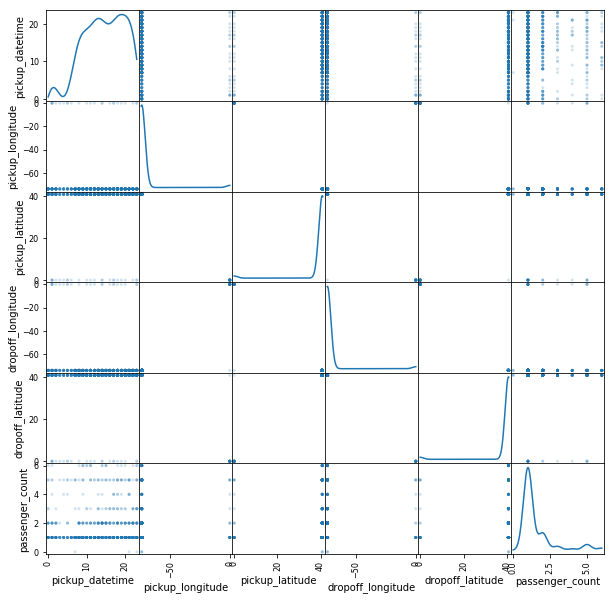

In [5]:
_ = scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

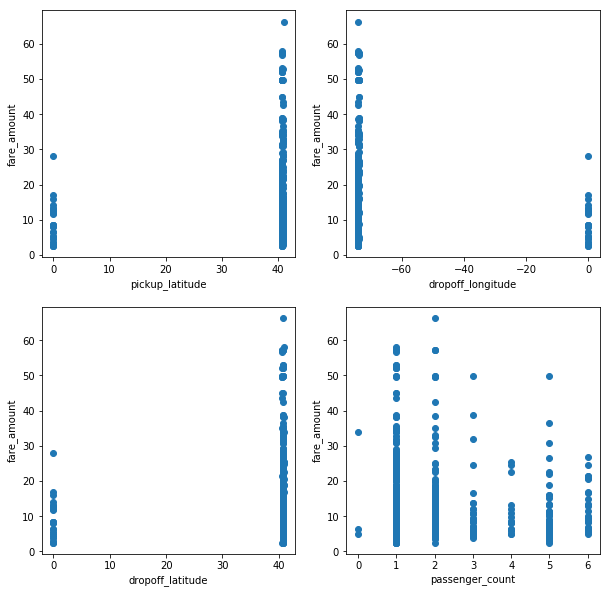

In [6]:
col_names = df.columns.values[2:]
plt.rcParams['figure.figsize'] = [10, 10]
for i,n in enumerate(col_names):
    plt.subplot(2,2,i+1)
    plt.xlabel(n)
    plt.ylabel("fare_amount")
    plt.scatter(X[n],y)
plt.show()

## Regression

In [7]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
# r^2 Score
print("Score: {}".format(model.score(X,y)))

Score: 0.012560513516035153


#### What if we used Manhattan distance as a feature?

In [8]:
# Take the sum of the absolute values of the differences of the coordinates.
# For example, if x=(a,b) and y=(c,d), the Manhattan distance between x and y is |a−c|+|b−d|
X['e_dist'] = abs(X['pickup_longitude']-X['dropoff_longitude'])+abs(X['pickup_latitude']-X['dropoff_latitude'])
model.fit(X,y)
print("Score: {}".format(model.score(X,y)))

Score: 0.3906570659472866
